In [1]:
import numpy as np
import effector

In [2]:
np.random.seed(21)

In [3]:
X_test = np.random.uniform(-1, 1, (1000, 2))
axis_limits = np.array([[-1, -1], [1, 1]])

In [4]:
def predict(x):
    y = np.zeros(x.shape[0])
    ind = x[:, 1] > 0
    y[ind] = 10*x[ind, 0]
    y[~ind] = -10*x[~ind, 0]
    return y + np.random.normal(0, 1, x.shape[0])

In [5]:
def jacobian(x):
    J = np.zeros((x.shape[0], 2))
    ind = x[:, 1] > 0
    J[ind, 0] = 10
    J[~ind, 0] = -10
    return J

In [6]:
y_limits = [-15, 15]
dy_limits = [-25, 25]

## Global Effect

### PDP

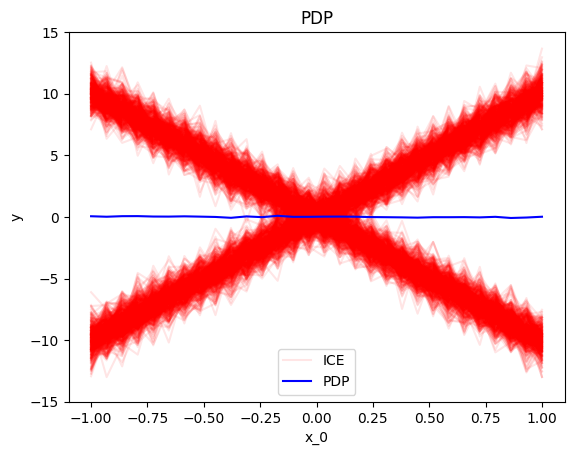

In [7]:
effector.PDP(X_test, predict, axis_limits=axis_limits).plot(feature=0, heterogeneity="ice", y_limits=y_limits)

### d-PDP

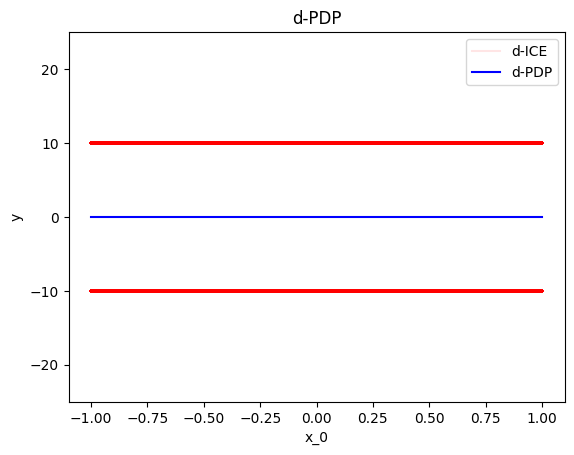

In [8]:
der_pdp = effector.DerPDP(X_test, predict, model_jac=jacobian, axis_limits=axis_limits)
der_pdp.plot(feature=0, heterogeneity="ice", dy_limits=dy_limits)

### RHALE

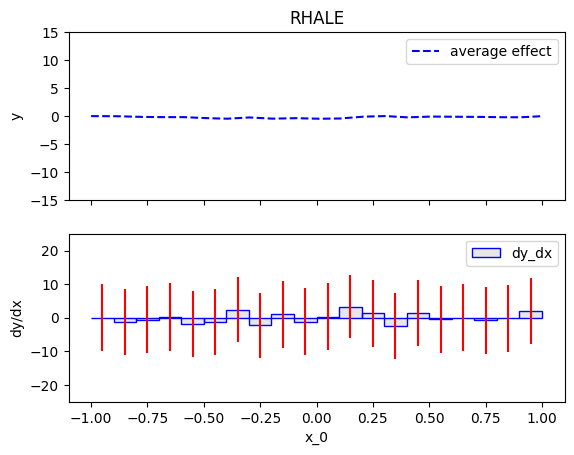

In [9]:
binning_method = effector.binning_methods.Greedy(init_nof_bins=20, min_points_per_bin=10)
rhale = effector.RHALE(X_test, predict, jacobian, axis_limits=axis_limits)
rhale.fit(features=0, binning_method=binning_method)
rhale.plot(feature=0, heterogeneity=True, y_limits=y_limits, dy_limits=dy_limits)

### ALE

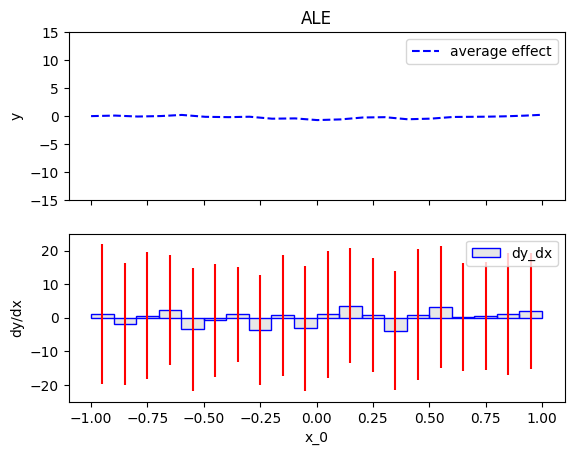

In [10]:
binning_method = effector.binning_methods.Fixed(nof_bins=20)
ale = effector.ALE(X_test, predict, axis_limits=axis_limits)
ale.fit(features=0, binning_method=binning_method)
ale.plot(feature=0, heterogeneity=True, y_limits=y_limits, dy_limits=dy_limits)

### SHAP-DP

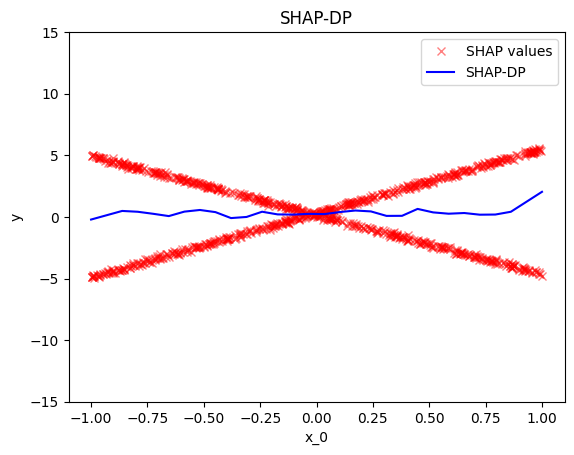

In [11]:
shap_dp = effector.ShapDP(X_test, predict, axis_limits=axis_limits, nof_instances="all")
binning_method = effector.binning_methods.Greedy(init_nof_bins=20)
shap_dp.fit(features=0, binning_method=binning_method)
shap_dp.plot(feature=0, heterogeneity="shap_values", y_limits=y_limits)

## Regional Effect

### RegionalPDP

In [12]:
effector.RegionalPDP(X_test, predict, axis_limits=axis_limits).summary(features=0)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 55.42it/s]



Feature 0 - Full partition tree:
Node id: 0, name: x_0, heter: 35.72 || nof_instances:  1000 || weight: 1.00
        Node id: 1, name: x_0 | x_1 <= 0.0, heter: 1.00 || nof_instances:   501 || weight: 0.50
        Node id: 2, name: x_0 | x_1  > 0.0, heter: 1.00 || nof_instances:   499 || weight: 0.50
--------------------------------------------------
Feature 0 - Statistics per tree level:
Level 0, heter: 35.72
        Level 1, heter: 1.00 || heter drop : 34.72 (units), 97.20% (pcg)




100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 48.36it/s]


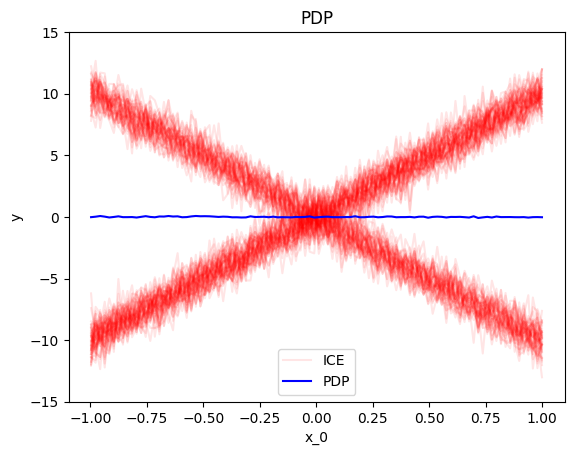

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 62.03it/s]


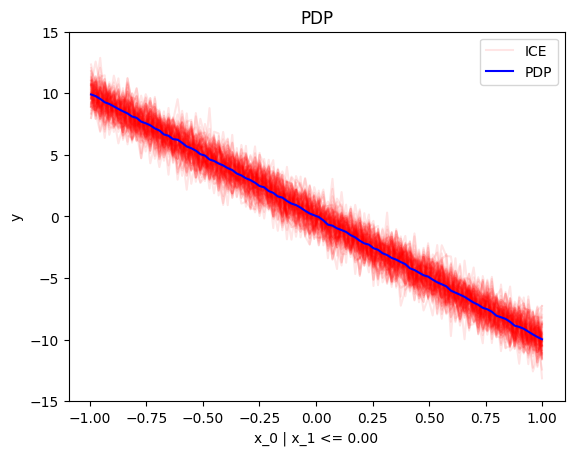

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 61.39it/s]


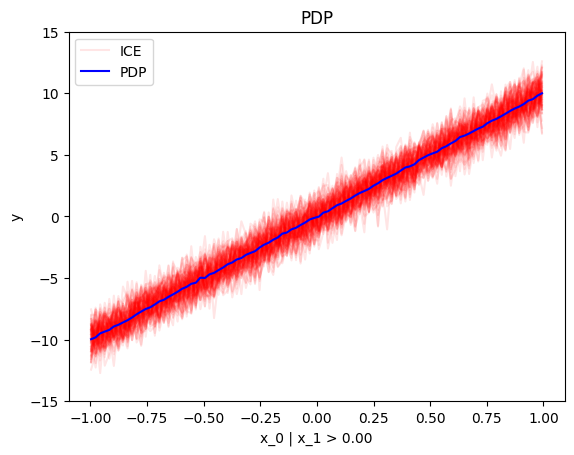

[None, None, None]

In [13]:
[effector.RegionalPDP(X_test, predict, axis_limits=axis_limits).plot(feature=0, node_idx=i, heterogeneity="ice", y_limits=y_limits) for i in range(3)]

### RegionalDerPDP

In [14]:
effector.RegionalDerPDP(X_test, predict, jacobian, axis_limits=axis_limits).summary(features=0)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 56.39it/s]



Feature 0 - Full partition tree:
Node id: 0, name: x_0, heter: 100.00 || nof_instances:  1000 || weight: 1.00
        Node id: 1, name: x_0 | x_1 <= 0.0, heter: 0.00 || nof_instances:   501 || weight: 0.50
        Node id: 2, name: x_0 | x_1  > 0.0, heter: 0.00 || nof_instances:   499 || weight: 0.50
--------------------------------------------------
Feature 0 - Statistics per tree level:
Level 0, heter: 100.00
        Level 1, heter: 0.00 || heter drop : 100.00 (units), 100.00% (pcg)




100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 51.52it/s]


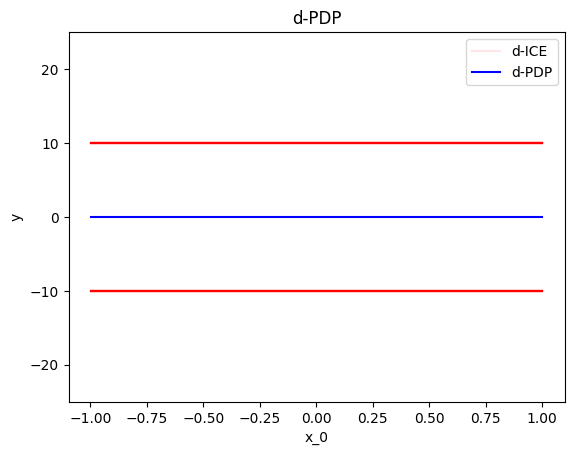

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 76.85it/s]


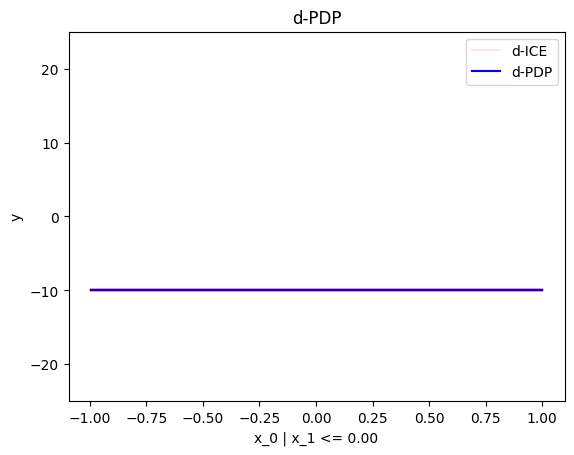

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 77.86it/s]


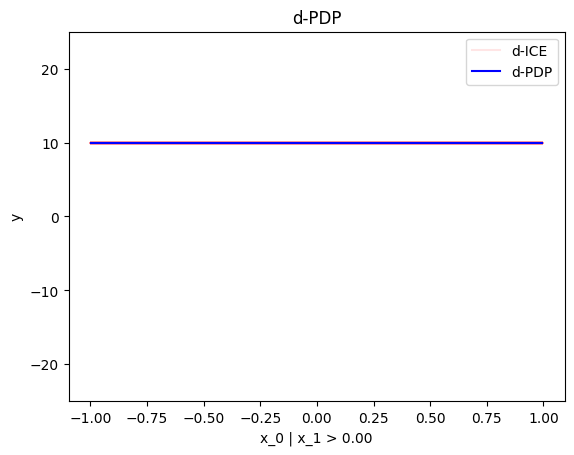

[None, None, None]

In [15]:
[effector.RegionalDerPDP(X_test, predict, jacobian, axis_limits=axis_limits).plot(feature=0, node_idx=i, heterogeneity="ice", dy_limits=dy_limits) for i in range(3)]

### Regional RHALE

In [16]:
effector.RegionalRHALE(X_test, predict, jacobian, axis_limits=axis_limits).summary(features=0)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.30it/s]



Feature 0 - Full partition tree:
Node id: 0, name: x_0, heter: 93.45 || nof_instances:  1000 || weight: 1.00
        Node id: 1, name: x_0 | x_1 <= 0.0, heter: 0.00 || nof_instances:   501 || weight: 0.50
        Node id: 2, name: x_0 | x_1  > 0.0, heter: 0.00 || nof_instances:   499 || weight: 0.50
--------------------------------------------------
Feature 0 - Statistics per tree level:
Level 0, heter: 93.45
        Level 1, heter: 0.00 || heter drop : 93.45 (units), 100.00% (pcg)




100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.16it/s]


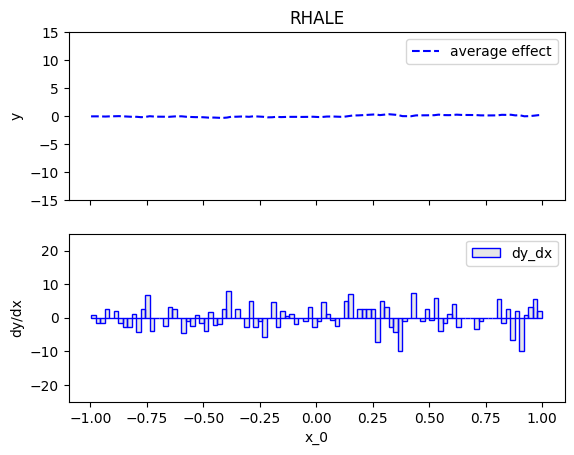

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.39it/s]


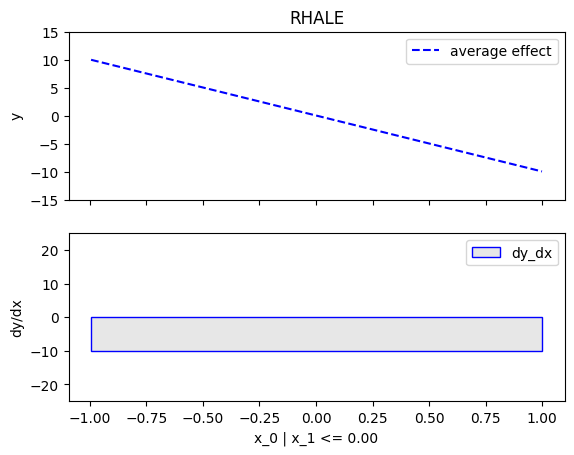

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.44it/s]


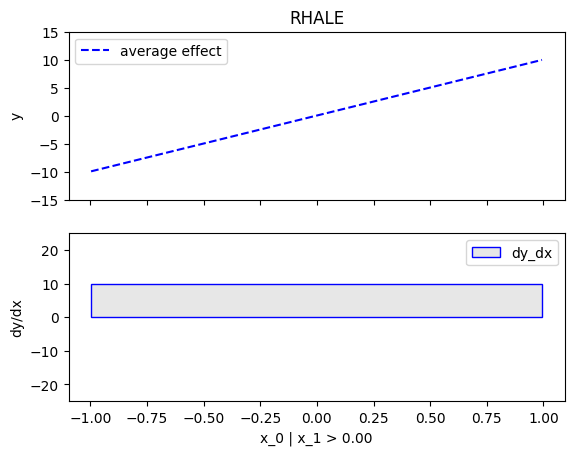

[None, None, None]

In [17]:
[effector.RegionalRHALE(X_test, predict, jacobian, axis_limits=axis_limits).plot(feature=0, centering=True, node_idx=i, y_limits=y_limits, dy_limits=dy_limits) for i in range(3)]

### RegionalALE

In [18]:
effector.RegionalALE(X_test, predict, axis_limits=axis_limits).summary(features=0)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 46.00it/s]



Feature 0 - Full partition tree:
Node id: 0, name: x_0, heter: 289.24 || nof_instances:  1000 || weight: 1.00
        Node id: 1, name: x_0 | x_1 <= 0.0, heter: 183.08 || nof_instances:   501 || weight: 0.50
        Node id: 2, name: x_0 | x_1  > 0.0, heter: 193.44 || nof_instances:   499 || weight: 0.50
--------------------------------------------------
Feature 0 - Statistics per tree level:
Level 0, heter: 289.24
        Level 1, heter: 188.25 || heter drop : 100.99 (units), 34.92% (pcg)




100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 37.83it/s]


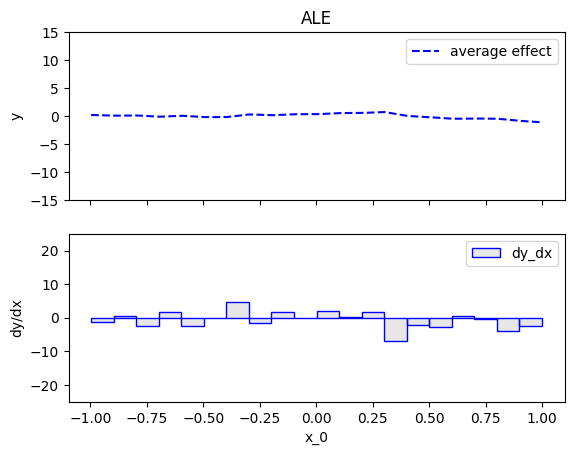

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 51.45it/s]


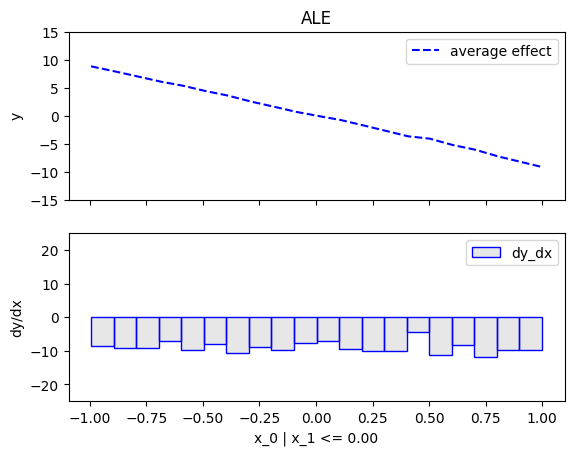

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 56.82it/s]


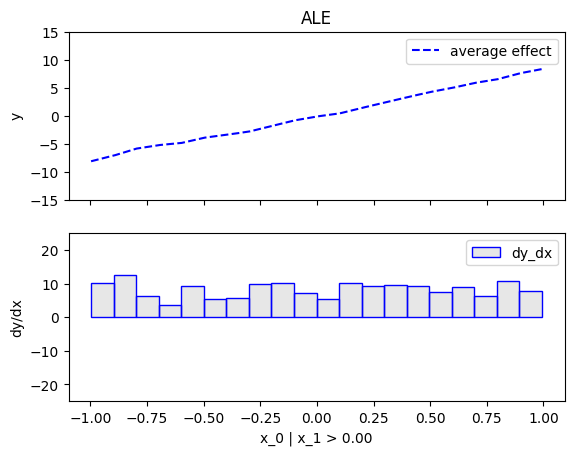

[None, None, None]

In [19]:
[effector.RegionalALE(X_test, predict, axis_limits=axis_limits).plot(feature=0, centering=True, node_idx=i, y_limits=y_limits, dy_limits=dy_limits) for i in range(3)]

### RegionalShapDP

In [20]:
reg_shapdp = effector.RegionalShapDP(X_test, predict, axis_limits=axis_limits, nof_instances="all")
binning_method = effector.binning_methods.Greedy(init_nof_bins=10)
reg_shapdp.fit(features=0, binning_method=binning_method)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.51it/s]


In [21]:
reg_shapdp.summary(features=0)



Feature 0 - Full partition tree:
Node id: 0, name: x_0, heter: 8.35 || nof_instances:  1000 || weight: 1.00
        Node id: 1, name: x_0 | x_1 <= 0.0, heter: 0.01 || nof_instances:   501 || weight: 0.50
        Node id: 2, name: x_0 | x_1  > 0.0, heter: 0.01 || nof_instances:   499 || weight: 0.50
--------------------------------------------------
Feature 0 - Statistics per tree level:
Level 0, heter: 8.35
        Level 1, heter: 0.01 || heter drop : 8.34 (units), 99.86% (pcg)




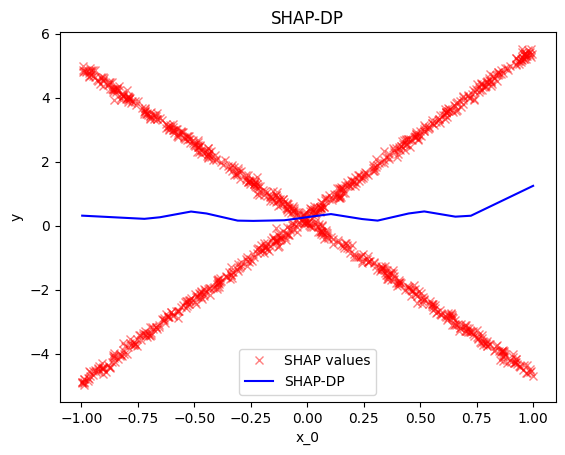

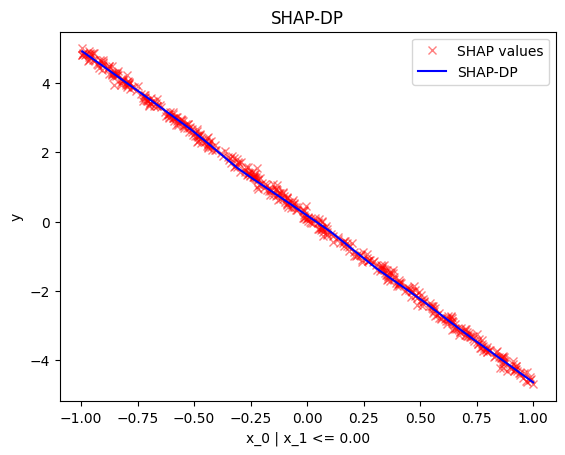

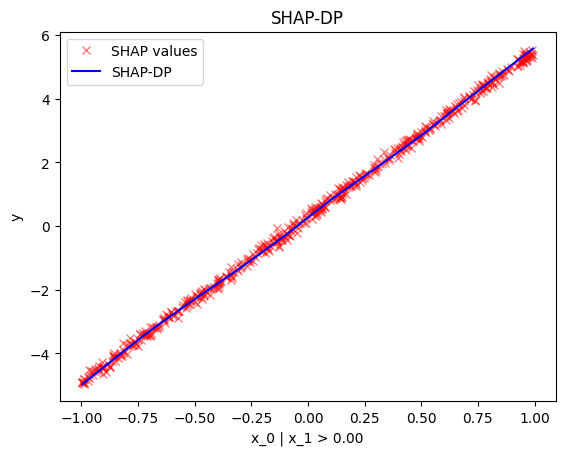

[None, None, None]

In [22]:
[reg_shapdp.plot(feature=0, node_idx=i, heterogeneity="shap_values") for i in range(3)]